# Malignant comments-classifier

In [1]:
#import the train dataset
import pandas as pd
import numpy as np
df=pd.read_csv("malignant_train.csv")
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Exploratory Data Analysis

In [2]:
#check the dimensions of the data
df.shape

(159571, 8)

* The dataset has 159571 rows and 8 columns

In [3]:
#check the names of columns in dataset
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [4]:
#check the datatype of each feature
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

#### Observations:
   * There are two columns with "object" data type they are "id" and "comment_text"
   * "Malignant" , " Highly_malignant" , "rude" , "threat" , "abuse" , "loathe" are all interger datatype
    

In [5]:
#checking if there are any null values in the dataset
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [6]:
#alternative way to check null values :yeilds bollean output
df.isnull().any()

id                  False
comment_text        False
malignant           False
highly_malignant    False
rude                False
threat              False
abuse               False
loathe              False
dtype: bool

In [7]:
#check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### Observations
   * The info() method thus returns the data type as well as the non-null values and memory usage.
   * Out of the total of 8 columns 2 columns are "object" type while rest of them are integer datatype.

In [8]:
#check number of unique values in each class;
df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

#### Observations:
   * All the integer columns has 2 unique values each " '0' and '1' which represents whether it is a "yes" or "No" 

In [9]:
#checking number of unique values in integer columns and value counts of each
for cols in df.columns:
    if df[cols].dtypes=='int64':
        print(str(cols)+ ':' + str(df[cols].unique()))
        print(df[cols].value_counts())
        print("*********************************************************************************")
        print('\n')        

malignant:[0 1]
0    144277
1     15294
Name: malignant, dtype: int64
*********************************************************************************


highly_malignant:[0 1]
0    157976
1      1595
Name: highly_malignant, dtype: int64
*********************************************************************************


rude:[0 1]
0    151122
1      8449
Name: rude, dtype: int64
*********************************************************************************


threat:[0 1]
0    159093
1       478
Name: threat, dtype: int64
*********************************************************************************


abuse:[0 1]
0    151694
1      7877
Name: abuse, dtype: int64
*********************************************************************************


loathe:[0 1]
0    158166
1      1405
Name: loathe, dtype: int64
*********************************************************************************




#### Observations:
    
   * In each label maximum number of values are zero

In [10]:
#checking the correlation between variables
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


#### Observations:
   * The highest co-relation can be seen between rude--> abuse of 0.74
   * The second highest correlation is between malignant--->rude which is 0.67
   * malignant and abuse have a correlation of 0.64
   * Loathe and threat had the least correlations with all variables.


In [11]:
#statistical analysis
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### observations
 * For all the variables the minimun value is zero and maximum is 1.As there are only binary classes deviations cannot be studied

In [12]:
#checking the skewness
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

#### observations
* The highest skew is seen for threat and loathe
* malignant type had the less skewness

# Visualizations

In [13]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of comment: 394.139


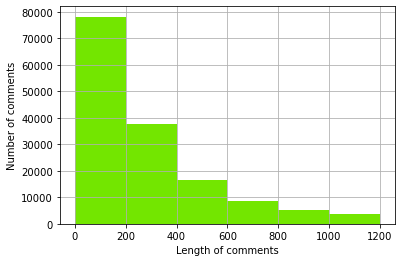

In [14]:
#plotting the average length of comments
comment=df["comment_text"]
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins,color='#73e600')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of comments was 394.129
* Maximumn number of comments had 0 to 200 words
* There were no lengthy comments
* Comments with 800 and above words were very few.

In [15]:
#checking the number of comments types together (only for visualizing and getting inferences what type of comments are present)

def MakeSingleCol(df):
    lst = []
    for i  in df[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']].values:
        string = ""
        for key, value in dict(zip(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'],i)).items():
            if value == 1:
                string += str(key) + "_"
        lst.append(string)
        
    return ["Neutral" if i == "" else i for i in lst]
a = MakeSingleCol(df)

        classes
141694  Neutral
104147  Neutral
86205   Neutral
125574  Neutral
53483   Neutral


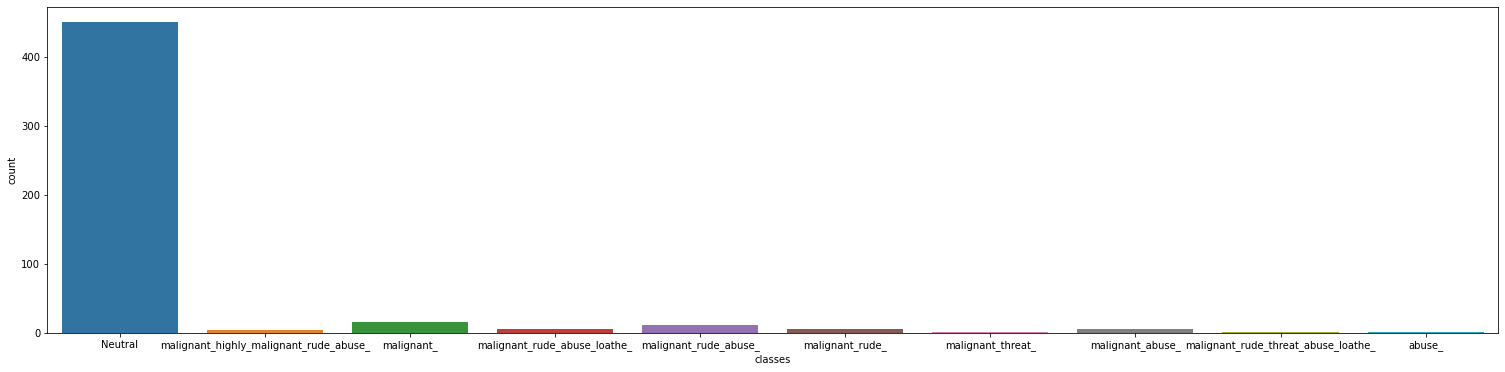

In [16]:
df1=pd.DataFrame({"classes":a})
print(df1.sample(5))
plt.figure(figsize=(26,6))
sns.countplot(df1['classes'][:500])
plt.show()

#### Observation
* while most of the comments were neutral we can see various combination of the comment types such as malignant with rude,malilgnant with rude abuse and threat etc.

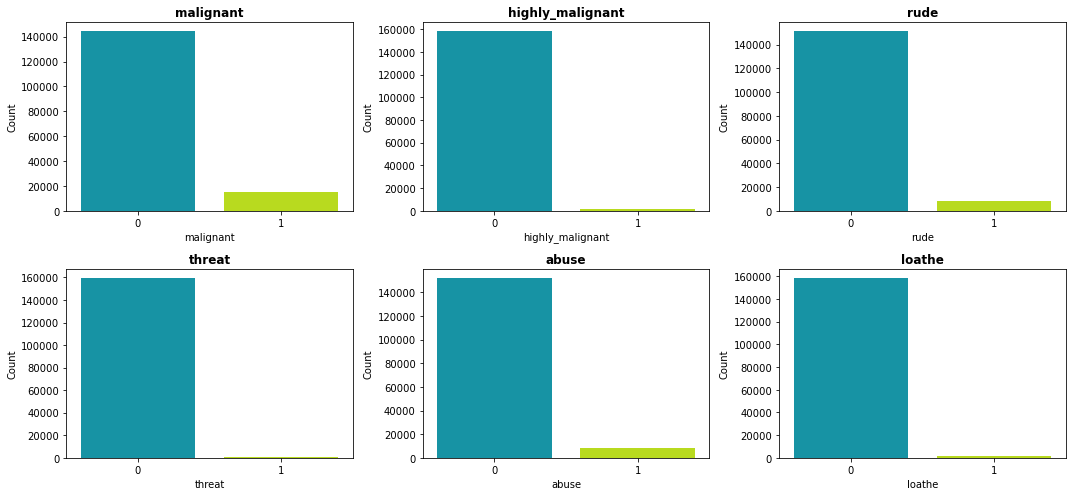

In [17]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * For all type of comments the value count for class "1" is very less as compared to the value count for class"0"

In [18]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[2:]
print(categories)

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


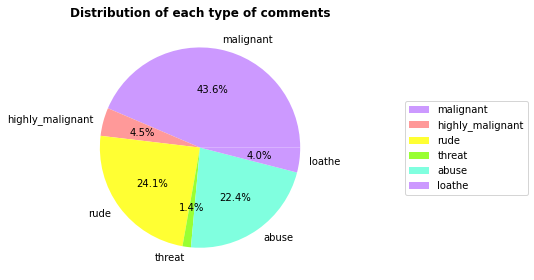

In [19]:
#distribution plot of each type of comment
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of each type of comments",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* Malignant comments had the highest share of all which was 43.6%
* Rude comments were second highest and abuse had 22.4% of share in the total distribution.
* loathe comments very least(4.0%)

In [20]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


#### Observations:
   * Maximum number of comments were malignant in nature.
   * Rude and abuse had the second highest number of comments.
   * Threat comments were the least 

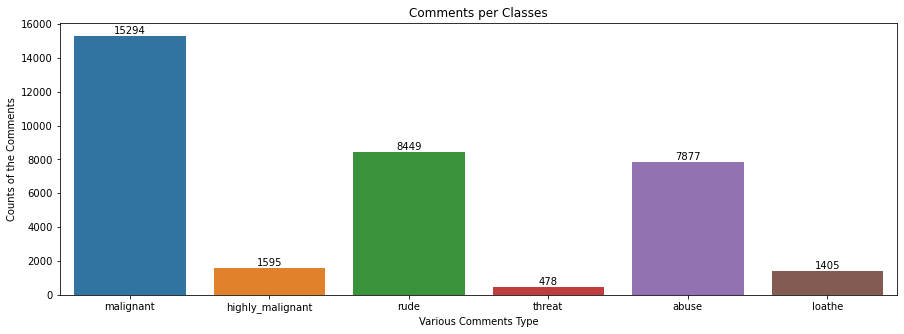

In [21]:
# Checking the count of the various types of comments
cols = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Comments per Classes")
plt.xlabel("Various Comments Type")
plt.ylabel("Counts of the Comments")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 15294 malginant comments which are maximum.Rude comments were second highest.
* Threat comments count was only 478 which is the least.
* Highly malignant and loathe comments were moderate in number.

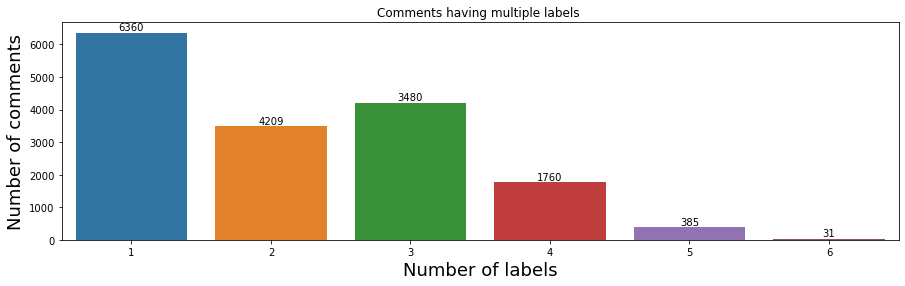

In [22]:
#countplot of comments with multiple labels
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

#sns.set(font_scale = 2)
plt.figure(figsize=(15,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### Observations:
    
* There were 6360 comments which fall into only 1 category of the comment type.
* 4209 comments had 2 labels for example malignant and rude
* 3480 comments had 3 labels for example malignant,abuse and rude
* There were 31 comments which had all 6 type of comments at the same time.

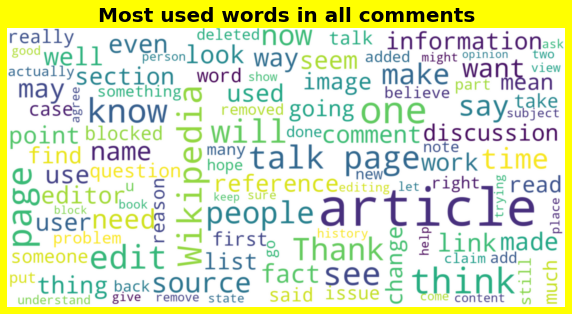

In [23]:
# most occuring words in all comments
from wordcloud import WordCloud
words = ' '.join([text for text in df['comment_text'] ])


word_cloud = WordCloud(width=1600,height=800,
                       max_words=700, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="White").generate(words)

plt.figure(figsize=(10, 16),facecolor='yellow')
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('Most used words in all comments', fontsize = 20,fontweight='bold')
plt.axis("off")
plt.show()

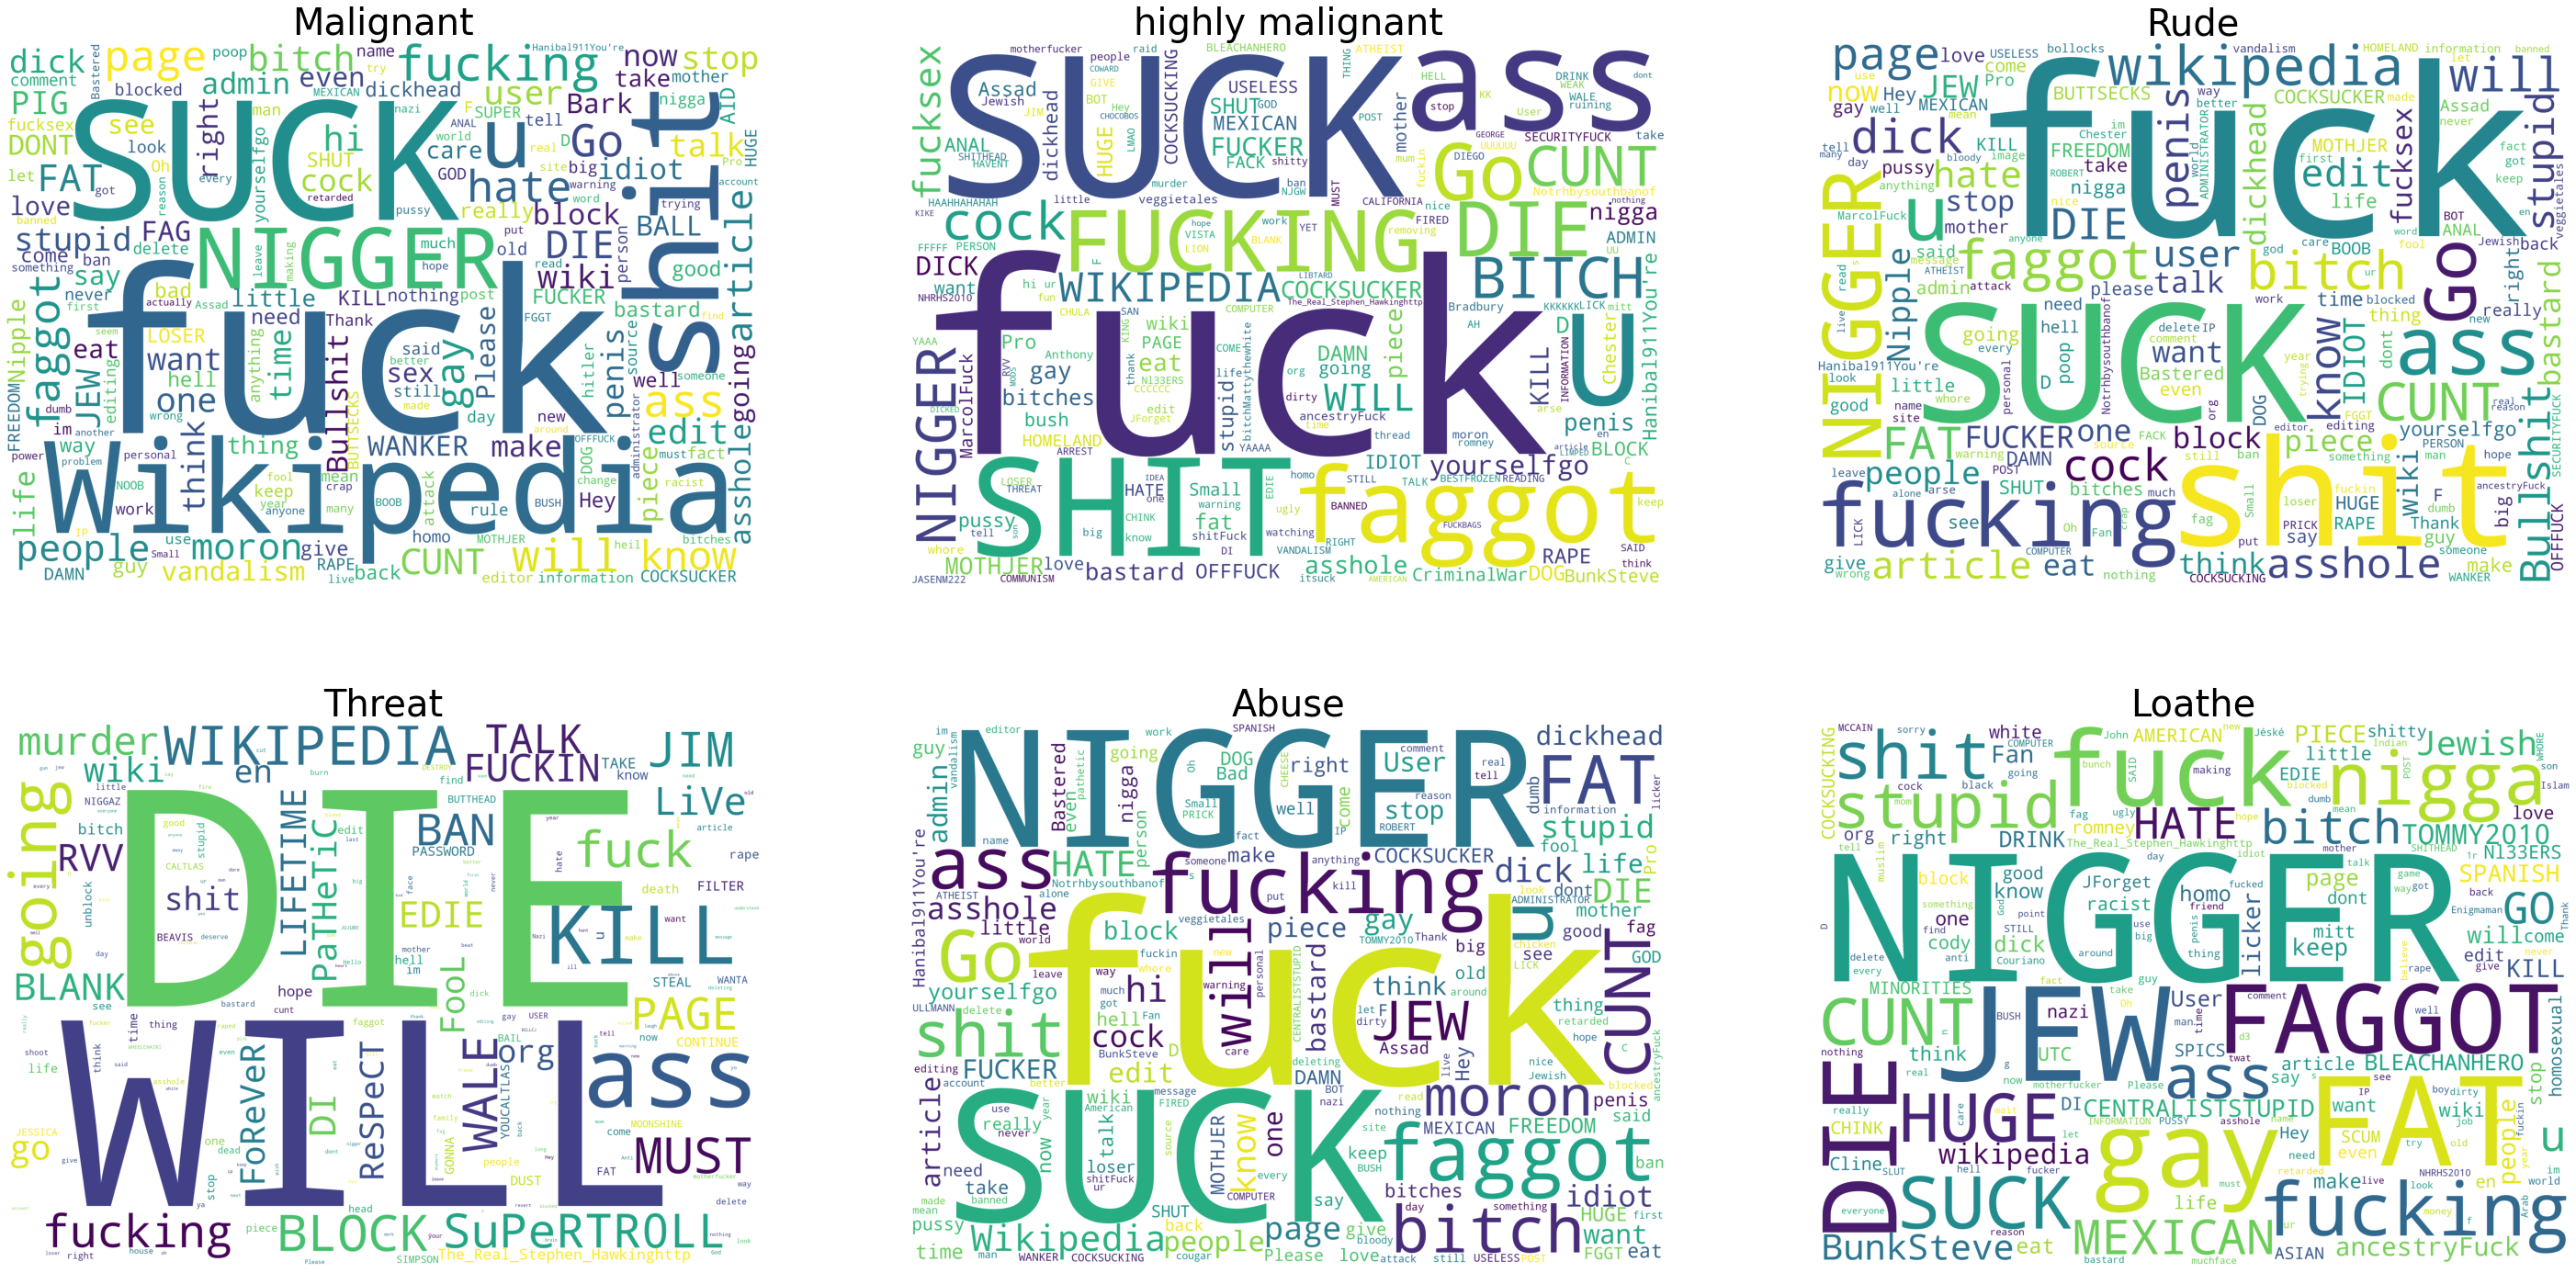

In [24]:
from wordcloud import STOPWORDS

plt.figure(figsize=(50,25))

# toxic
subset = df[df.malignant==1]
text = subset.comment_text.values
cloud_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='White',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Malignant",fontsize=40)
plt.imshow(cloud_malignant)


# highly malignant
subset = df[df.highly_malignant==1]
text = subset.comment_text.values
cloud_highly_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='White',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("highly malignant",fontsize=40)
plt.imshow(cloud_highly_malignant)


# rude
subset = df[df.rude==1]
text = subset.comment_text.values
cloud_rude = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='White',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Rude",fontsize=40)
plt.imshow(cloud_rude)


# threat
subset = df[df.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='White',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# abuse
subset = df[df.abuse==1]
text = subset.comment_text.values
cloud_abuse = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='White',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Abuse",fontsize=40)
plt.imshow(cloud_abuse)


# Loathe
subset = df[df.loathe==1]
text = subset.comment_text.values
cloud_loathe = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='White',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Loathe",fontsize=40)
plt.imshow(cloud_loathe)

plt.show()

#### Observations:
   * we can observe the words with higher font had high frequncy .
   * Various abusing words are highlighted in the wordcloud above as per the toxicity level.

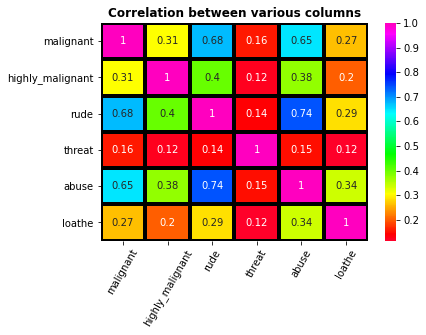

In [25]:
#correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='gist_rainbow',linecolor='black',linewidth=3)
plt.title("Correlation between various columns",fontweight='bold')
plt.xticks(rotation=60)
plt.show()

#### Observations:
   * The highest co-relation can be seen between rude--> abuse of 0.74
   * The second highest correlation is between malignant--->rude which is 0.68
   * malignant and abuse have a correlation of 0.65
   * Loathe and threat had the least correlations with all variables.

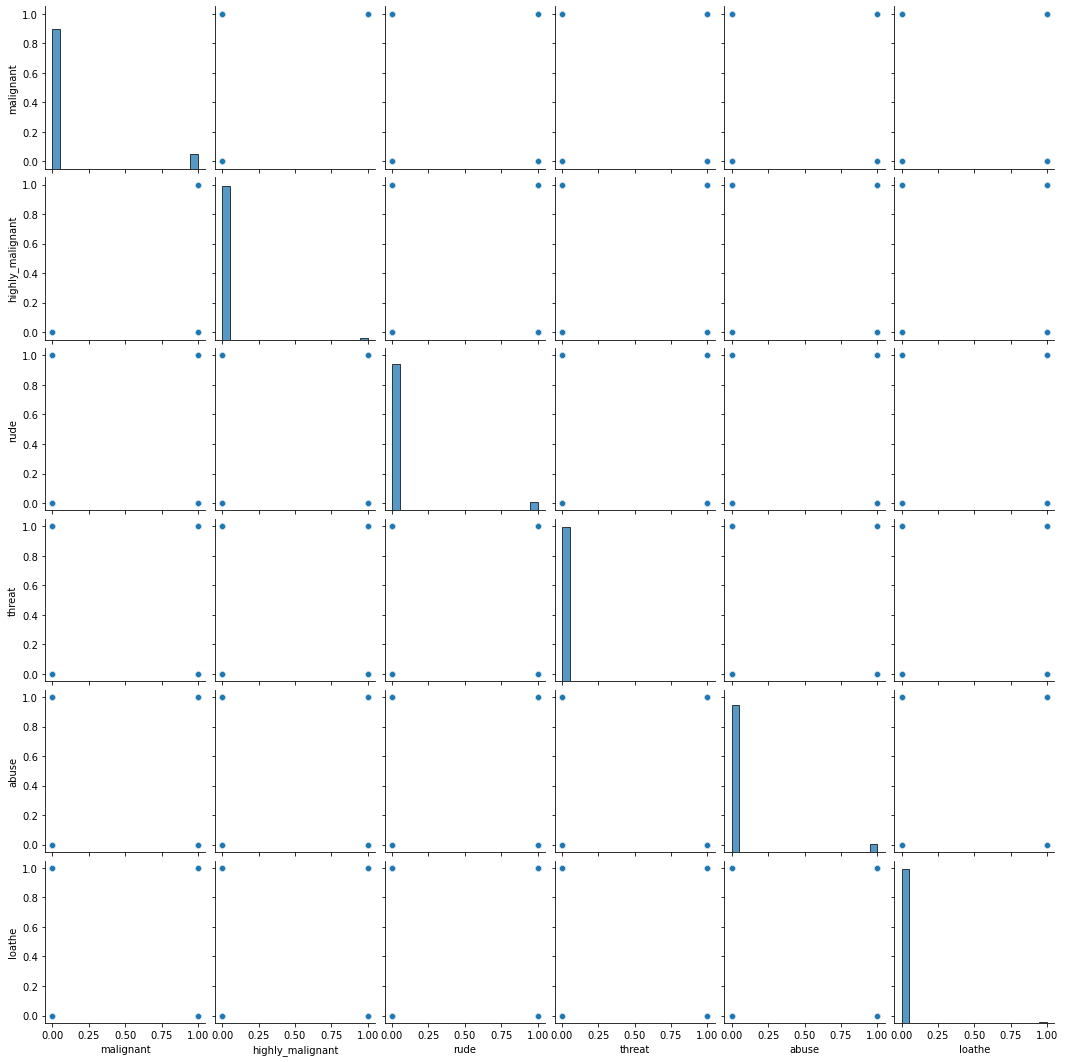

In [26]:
#pairplot of all columns
sns.pairplot(df)
plt.show()

##  Data Pre-Processing

As the dataset is too large and we do not have enough ram to process the same we shall take few random samples to train and save the model

In [27]:
#choose any 2000 samples from the data randomly
data = df
data = df.loc[np.random.choice(df.index, size=2000)]
data.shape

(2000, 8)

In [28]:
#convert all text into lowercase 
data['comment_text'] = data['comment_text'].str.lower()
#check if the text is lower cased
data['comment_text'][0:2]

125693    o hello ! \n\no hello mr.favonian\n i dont car...
107938    does anyone even know what the hell this song ...
Name: comment_text, dtype: object

In [29]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'][0:2]

125693    o hello ! \n\no hello mr.favonian\n i dont car...
107938    does anyone even know what the hell this song ...
Name: comment_text, dtype: object

In [30]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'][0:2]

125693    o hello    o hello mr favonian  i dont care th...
107938    does anyone even know what the hell this song ...
Name: comment_text, dtype: object

In [31]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data['comment_text'][0:2]

125693    o hello o hello mr favonian i dont care that y...
107938    does anyone even know what the hell this song ...
Name: comment_text, dtype: object

In [32]:
#cleaned data
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
125693,a06b29c14511e23d,o hello o hello mr favonian i dont care that y...,0,0,0,0,0,0
107938,40f93a6d1792a4d4,does anyone even know what the hell this song ...,1,0,0,0,0,0
66621,b24a08f334e4c122,you know what you are running from but not wha...,0,0,0,0,0,0
22775,3c246ef1c0c2b45d,what is a front end processor,0,0,0,0,0,0
79059,d3979b58efaf9711,ill also add that if you do not like the truth...,0,0,0,0,0,0


In [33]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [34]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
125693,a06b29c14511e23d,hello hello mr favonian dont care blocked...,0,0,0,0,0,0
107938,40f93a6d1792a4d4,anyone even know hell song about,1,0,0,0,0,0
66621,b24a08f334e4c122,know running youre running ethnicity...,0,0,0,0,0,0
22775,3c246ef1c0c2b45d,front end processor,0,0,0,0,0,0
79059,d3979b58efaf9711,ill also add like truth edit wikiped...,0,0,0,0,0,0


In [35]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
125693,a06b29c14511e23d,hello hello mr favonian dont care block afraid...,0,0,0,0,0,0
107938,40f93a6d1792a4d4,anyon even know hell song about,1,0,0,0,0,0
66621,b24a08f334e4c122,know run your run ethnic solut totalitarian th...,0,0,0,0,0,0
22775,3c246ef1c0c2b45d,front end processor,0,0,0,0,0,0
79059,d3979b58efaf9711,ill also add like truth edit wikipedia warn ti...,0,0,0,0,0,0


### Train-Test Split

In [36]:
# assigning comments to x
x = data['comment_text']
print(x.sample)

<bound method NDFrame.sample of 125693    hello hello mr favonian dont care block afraid...
107938                      anyon even know hell song about
66621     know run your run ethnic solut totalitarian th...
22775                                   front end processor
79059     ill also add like truth edit wikipedia warn ti...
                                ...                        
75761     januari utc hello xeltifon someon simpli go ru...
59086     lphant comparison edonkey softwar undo edit pl...
121592    blood libel equal jewish holocaust denier hell...
3500      oh noe insult internet get moron block doesnt ...
151496    map secular state incorrect england iceland mo...
Name: comment_text, Length: 2000, dtype: object>


In [37]:
# assign labels to y
y = data.iloc[:,2:]
print(y.sample())

       malignant  highly_malignant  rude  threat  abuse  loathe
22980          0                 0     0       0      0       0


In [38]:
#check the shapes of x and y
print("x.shape = ",x.shape)
print("y.shape = ",y.shape)

x.shape =  (2000,)
y.shape =  (2000, 6)


In [39]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features =2000)
#convert text into vectors
x = tf.fit_transform(x)
x

<2000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 43077 stored elements in Compressed Sparse Row format>

In [40]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
print("Train shapes : X = {}, y = {}".format(x_train.shape,y_train.shape))
print("Test shapes : X = {}, y = {}".format(x_test.shape,y_test.shape))

Train shapes : X = (1600, 2000), y = (1600, 6)
Test shapes : X = (400, 2000), y = (400, 6)


### Understanding few concepts before actual model building

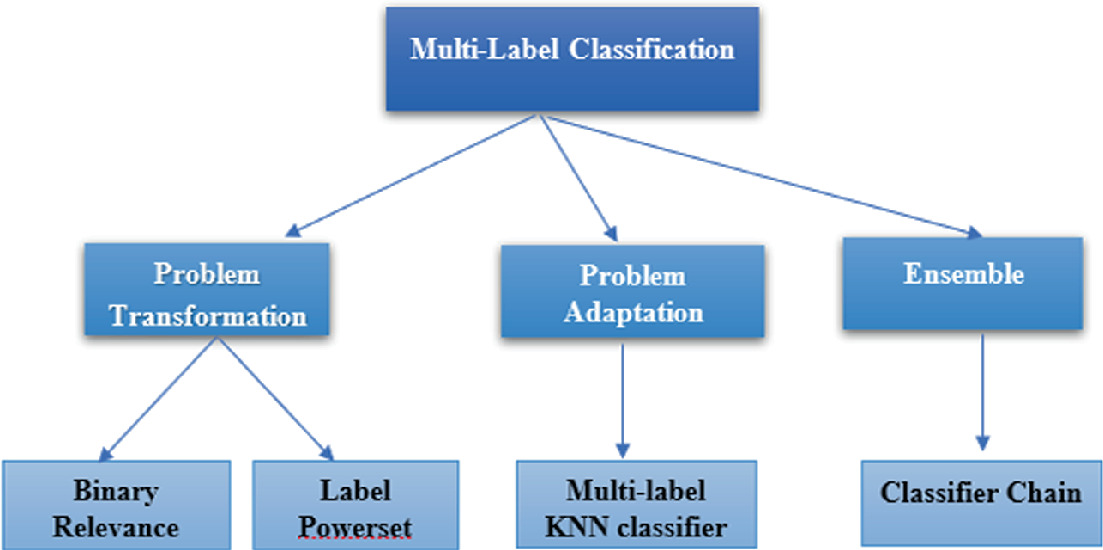

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



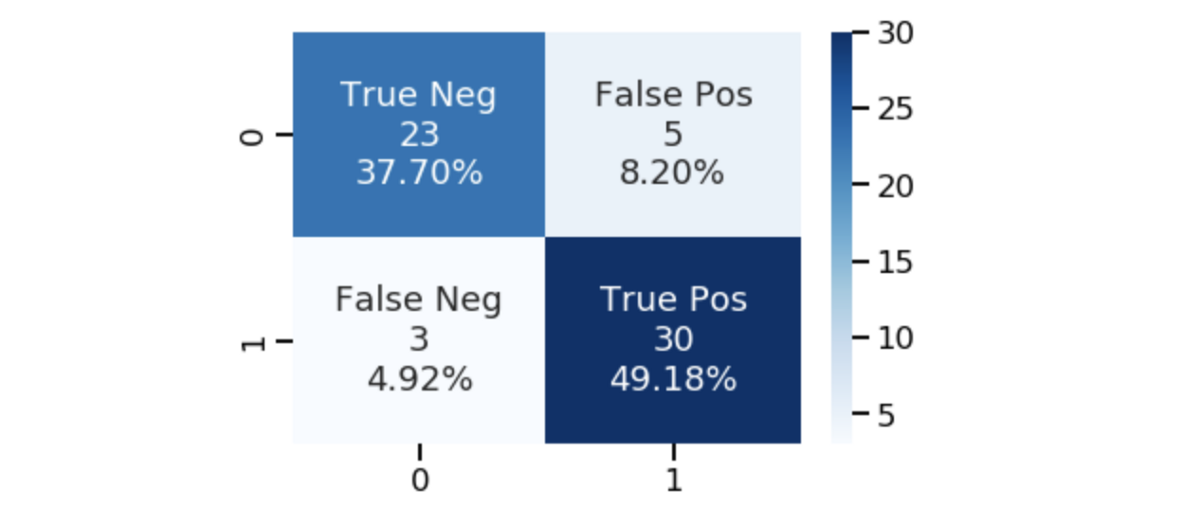

In [41]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [42]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  80.75
Cross validation score= 83.04931618274946


log loss= 2.133116470314571
hamming loss= 0.0575


f1 score= 0.3168316831683169
average precision score= 0.2782608695652174
AUC ROC score= 0.5939693024131705


 label ranking average precision score= 0.9576250000000003
coverage area= 0.515




In [43]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[324,  42],
        [ 17,  17]],

       [[392,   2],
        [  5,   1]],

       [[360,  19],
        [ 14,   7]],

       [[396,   1],
        [  3,   0]],

       [[362,  18],
        [ 13,   7]],

       [[396,   1],
        [  3,   0]]], dtype=int64)

#### Observations:
   * For label(1) i.e malignant class there are 17 True positives and 324 True Negatives and (17+42) i.e 59 errorneous values (FP and FN ) 
   * For label(2) i.e highly_malignant class there is 1 True positives and 392 True Negatives and (5+2) i.e 7 errorneous values (FP and FN )    
   * For label(3) i.e rude class there are 7 True positives and 360 True Negatives and (14+19) i.e 33 errorneous values (FP and FN )
   * For label(4) i.e threat class there is 0 True positives and 396 True Negatives and (3+1) i.e 4 errorneous values (FP and FN )  
   * For label(5) i.e abuse class there are 7 True positives and 362 True Negatives and (18+13) i.e 31 errorneous values (FP and FN )
   * For label(6) i.e loathe class there is 0 True positives and 396 True Negatives and (3+1) i.e 4 errorneous values (FP and FN )

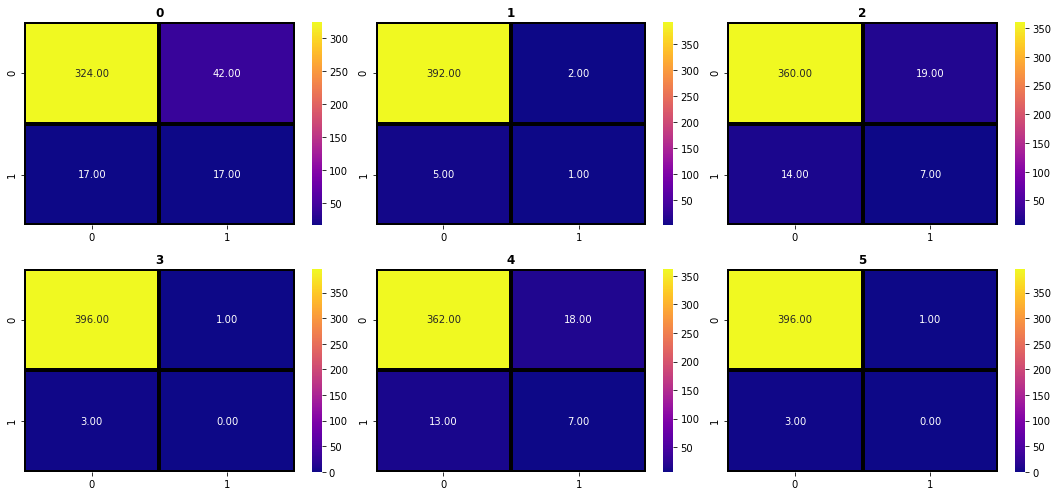

In [44]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,6):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [45]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_lps)

Accuracy =  85.5
Cross validation score= 86.45031838435138


log loss= 1.7382644951164647
hamming loss= 0.04541666666666667


AUC ROC score= 0.5694776759129783
f1 score= 0.3057324840764331
average precision score= 0.34285714285714286


coverage area= 0.5275
 label ranking average precision score= 0.9532083333333337


In [46]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[343,  23],
        [ 23,  11]],

       [[392,   2],
        [  6,   0]],

       [[370,   9],
        [ 14,   7]],

       [[396,   1],
        [  3,   0]],

       [[369,  11],
        [ 14,   6]],

       [[397,   0],
        [  3,   0]]], dtype=int64)

#### Observations:
   * For label(1) i.e malignant class there are 11 True positives and 343 True Negatives and (23+23) i.e 46 errorneous values (FP and FN )
   
   * For label(2) i.e highly_malignant class there is 0 True positives and 392 True Negatives and 8 errorneous values (FP and FN )
   
   * For label(3) i.e rude class there are 7 True positives and 370 True Negatives and (14+9) i.e 23 errorneous values (FP and FN )
   
   * For label(4) i.e threat class there is 0 True positives and 396 True Negatives and 4 errorneous values (FP and FN )

   * For label(5) i.e abuse class there are 6 True positives and 369 True Negatives and (14+11) i.e 25 errorneous values (FP and FN )
   * For label(6) i.e loathe class there is 0 True positives and 397 True Negatives and 3 errorneous values (FP and FN )

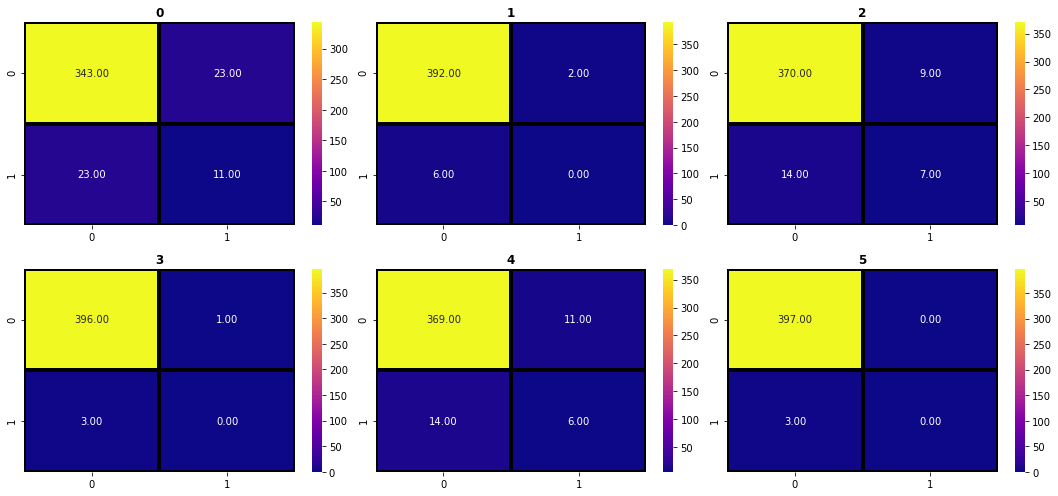

In [47]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,6): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [48]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_cc)

Accuracy =  91.25
Cross validation score= 90.65024544784664


log loss= 0.6192897523451344
hamming loss= 0.030833333333333334


AUC ROC score= 0.5485435402231068
f1 score= 0.27450980392156865
average precision score= 0.9333333333333333


coverage area= 0.525
 label ranking average precision score= 0.9502083333333334


In [49]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[366,   0],
        [ 29,   5]],

       [[394,   0],
        [  6,   0]],

       [[379,   0],
        [ 16,   5]],

       [[397,   0],
        [  3,   0]],

       [[379,   1],
        [ 16,   4]],

       [[397,   0],
        [  3,   0]]], dtype=int64)

#### Observations:
   * For label(1) i.e malignant class there are 5 True positives and 366 True Negatives and 29 errorneous values (FP and FN )
   
   * For label(2) i.e highly_malignant class there is 0 True positives and 394 True Negatives and 6 errorneous values (FP and FN )
   
   * For label(3) i.e rude class there are 5 True positives and 379 True Negatives and 16 errorneous values (FP and FN )
   
   * For label(4) i.e threat class there is 0 True positives and 397 True Negatives and 3 errorneous value (FP and FN )
   
   * For label(5) i.e abuse class there are 4 True positives and 379 True Negatives and (16+1) i.e 17 errorneous values (FP and FN )
   
   * For label(6) i.e loathe class there is 0 True positives and 397 True Negatives and 3 errorneous values (FP and FN )

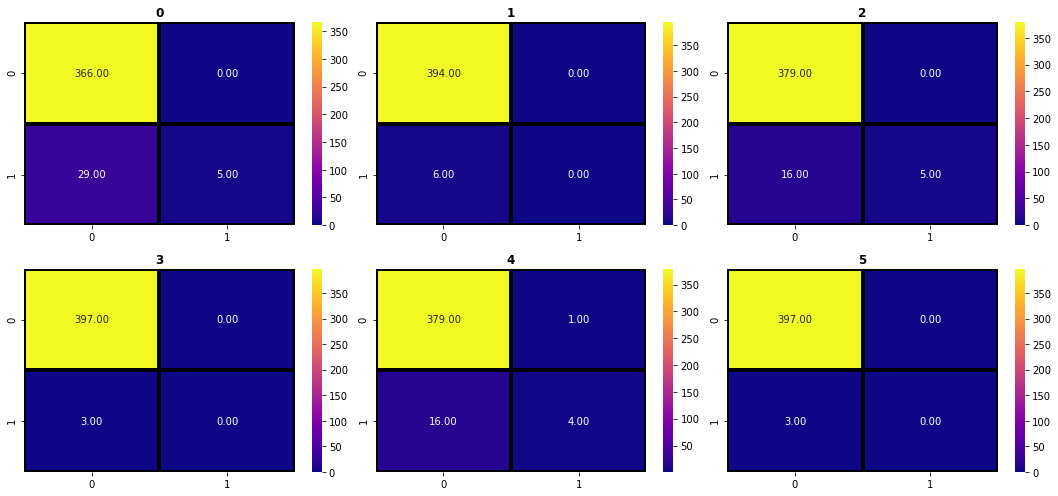

In [50]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,6): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [51]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  91.0
Cross validation score= 88.6005945975961


log loss= 0.5322696133658981
hamming loss= 0.03


AUC ROC score= 0.6570620742254459
f1 score= 0.4285714285714286
average precision score= 0.6923076923076923


 label ranking average precision score= 0.9508229166666666
coverage area= 0.515


In [52]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[363,   3],
        [ 26,   8]],

       [[391,   3],
        [  2,   4]],

       [[377,   2],
        [ 13,   8]],

       [[397,   0],
        [  2,   1]],

       [[377,   3],
        [ 14,   6]],

       [[396,   1],
        [  3,   0]]], dtype=int64)

#### Observations:
   * For label(1) i.e malignant class there are 8 True positives and 363 True Negatives and (26+3) i.e 29 errorneous values (FP and FN )
   
   * For label(2) i.e highly_malignant class there are 4 True positives and 391 True Negatives and (3+2) i.e 5 errorneous values (FP and FN )

   
   * For label(3) i.e rude class there are 8 True positives and 377 True Negatives and (13+2) i.e 15 errorneous values (FP and FN )
   
   * For label(4) i.e threat class there is 1 True positives and 397 True Negatives and 2 errorneous value (FP and FN )
   
   * For label(5) i.e abuse class there are 6 True positives and 377 True Negatives and (14+3) i.e 17 errorneous values (FP and FN )
   
   * For label(6) i.e loathe class there is 0 True positives and 396 True Negatives and 4 errorneous values (FP and FN )

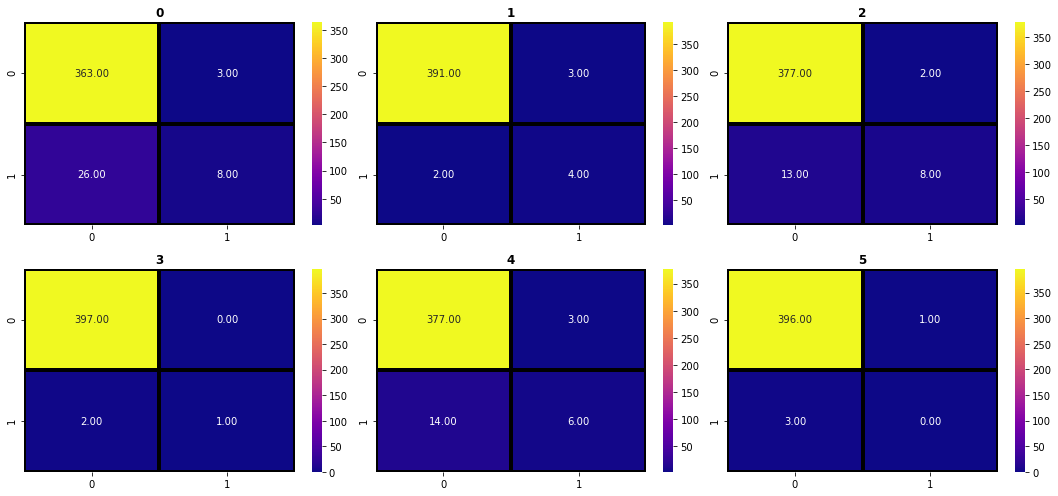

In [53]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,6): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

### Comparing all the models performance

In [54]:
#creating a comparision table for better understanding

df_comparison=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,91.25,90.650245,0.030833,0.619290,0.548544,0.274510,0.933333,0.5250,0.950208
1,Adapted algorithm,91.00,88.600595,0.030000,0.532270,0.657062,0.428571,0.692308,0.5150,0.950823
2,Label powerset,85.50,86.450318,0.045417,1.738264,0.569478,0.305732,0.342857,0.5275,0.953208
3,Binary Relevance,80.75,83.049316,0.057500,2.133116,0.593969,0.316832,0.278261,0.5150,0.957625


### Saving the best model

In [55]:
#saving classifier chain as our best model
import pickle
filename="malignant_model.pkl"
pickle.dump(classifier3,open(filename,'wb'))

In [56]:
actual=np.array(y_test)
predicted=classifier2.predict(x_test)

In [57]:
#converting the sparse matrix of predictions into array
pre=predicted.toarray().astype('int64')
pre

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [58]:
print(len(pre))
print(len(actual))

400
400


In [59]:
#making a dataframe of actual and predicted values
def makeDataFrame(a,b, cols = y_train.columns):
    a =  pd.DataFrame(a, columns=["actual_"+ i for i in cols ])
    b =  pd.DataFrame(b, columns=["predicted_"+ i for i in cols ])
    return pd.concat([a,b], axis=1)
df_compare=makeDataFrame(actual, pre)
df_compare

,actual_malignant,actual_highly_malignant,actual_rude,actual_threat,actual_abuse,actual_loathe,predicted_malignant,predicted_highly_malignant,predicted_rude,predicted_threat,predicted_abuse,predicted_loathe
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,1,0,0,0,0,0
396,0,0,0,0,0,0,1,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,0,0


### Importing the test data

In [61]:
df_test=pd.read_csv("test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [62]:
#check the shape
df_test.shape

(153164, 2)

In [63]:
#check if there are any null values
df_test.isnull().any()

id              False
comment_text    False
dtype: bool

### Perform all the preprocessing steps that were performed on the train data

In [64]:
df_test['comment_text'] =df_test['comment_text'].str.lower()
df_test['comment_text'] = df_test['comment_text'].apply(cleanHtml)
df_test['comment_text'] = df_test['comment_text'].apply(cleanPunc)
df_test['comment_text'] = df_test['comment_text'].apply(keepAlpha)
df_test['comment_text'] = df_test['comment_text'].apply(removeStopWords)
df_test['comment_text'] = df_test['comment_text'].apply(stemming)
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succes youll ever what hate s...
1,0000247867823ef7,rfc titl fine imo
2,00013b17ad220c46,sourc zaw ashton lapland
3,00017563c3f7919a,look back sourc inform updat correct form gues...
4,00017695ad8997eb,dont anonym edit articl all


In [65]:
df_test.drop(columns="id",axis=1,inplace=True)
df_test.sample()

,comment_text
116466,also cnn link appear dead now


In [66]:
# assigning comments to x
x = df_test['comment_text']
print(x.sample)

<bound method NDFrame.sample of 0         yo bitch ja rule succes youll ever what hate s...
1                                         rfc titl fine imo
2                                  sourc zaw ashton lapland
3         look back sourc inform updat correct form gues...
4                               dont anonym edit articl all
                                ...                        
153159                      total agre stuff noth long crap
153160    throw field home plate get faster throw cut ma...
153161    okinotorishima categori see chang agre correct...
153162    one found nation eu germani law return quit si...
153163    stop alreadi bullshit welcom im fool think kin...
Name: comment_text, Length: 153164, dtype: object>


In [67]:
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features =2000)
#convert text into vectors
x = tf.fit_transform(x)
x

<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2855735 stored elements in Compressed Sparse Row format>

In [68]:
#load the saved model
saved_model=pickle.load(open("malignant_model.pkl",'rb'))
saved_model

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [69]:
# use the saved model to make predictions
predictions=saved_model.predict(x)
predictions

<153164x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8957 stored elements in Compressed Sparse Column format>

In [70]:
#convert the sparse matrix into an array 
test_pred=predictions.toarray().astype("int64")
test_pred

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [71]:
# convert numpy array to dataframe
df_test_predictions = pd.DataFrame(test_pred, columns =['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe'])
print("\n Paredictions DataFrame: ")
df_test_predictions.sample(15)


 Paredictions DataFrame: 


,malignant,highly_malignant,rude,threat,abuse,loathe
119098,0,0,0,0,0,0
120015,0,0,0,0,0,0
13206,0,0,0,0,0,0
25106,0,0,0,0,0,0
24573,0,0,0,0,0,0
2610,0,0,0,0,0,0
114314,0,0,0,0,0,0
105352,0,0,0,0,0,0
130907,0,0,0,0,0,0
138886,0,0,0,0,0,0


In [74]:
#saving the predictions as a csv file
df_test_predictions.to_csv("predictions on test dataset.csv")

In [75]:
df_test_predictions.malignant.unique()

array([0, 1], dtype=int64)

##### Thankyou